# Step-1: Download The Dataset

In [61]:
# import libraries
import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from datetime import date, timedelta
from datetime import date
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [62]:
# define the dates to fetch the data
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = today - timedelta(days=730)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
print(f'Data will be between {start_date} and {end_date}')

Data will be between 2023-05-10 and 2025-05-09


In [63]:
# define the ticker
ticker = 'ETH-USD'
df = yf.download(ticker, start=start_date, end=end_date, progress=False)
df.head()

Price,Close,High,Low,Open,Volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
Date,,,,,
2023-05-10,1842.401489,1886.800293,1795.668823,1848.213501,9945549603
2023-05-11,1796.490601,1842.492065,1774.132568,1842.492065,8353828312
2023-05-12,1808.019775,1812.424927,1742.403809,1795.176636,9047198660
2023-05-13,1796.114868,1816.058472,1788.475586,1808.375000,4647630864
2023-05-14,1800.500977,1823.490723,1793.228760,1796.107910,4711210241


In [64]:
df.tail(5)

Price,Close,High,Low,Open,Volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
Date,,,,,
2025-05-03,1833.839722,1848.246826,1812.815674,1842.718140,8344452620
2025-05-04,1808.594238,1849.998535,1804.495117,1833.647217,8918979887
2025-05-05,1819.697510,1832.050781,1783.314819,1808.704956,11389336489
2025-05-06,1815.087524,1820.796631,1753.315430,1819.734009,13206516310
2025-05-07,1811.606689,1849.658447,1788.687378,1815.018921,50540755039


# Step-2: Exploratory Data Analysis (EDA):

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 729 entries, 2023-05-10 to 2025-05-07
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, ETH-USD)   729 non-null    float64
 1   (High, ETH-USD)    729 non-null    float64
 2   (Low, ETH-USD)     729 non-null    float64
 3   (Open, ETH-USD)    729 non-null    float64
 4   (Volume, ETH-USD)  729 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 34.2 KB


In [66]:
# insert date column into the dataset at 0 index
df.insert(0, 'Date', df.index, True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Date, )           729 non-null    datetime64[ns]
 1   (Close, ETH-USD)   729 non-null    float64       
 2   (High, ETH-USD)    729 non-null    float64       
 3   (Low, ETH-USD)     729 non-null    float64       
 4   (Open, ETH-USD)    729 non-null    float64       
 5   (Volume, ETH-USD)  729 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 34.3 KB


In [67]:
df.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
count,729,729.000000,729.000000,729.000000,729.000000,7.290000e+02
mean,2024-05-08 00:00:00,2546.095460,2603.333684,2483.535838,2546.143611,1.560949e+10
min,2023-05-10 00:00:00,1472.553101,1560.325073,1386.799316,1472.601440,2.081626e+09
25%,2023-11-08 00:00:00,1870.602539,1897.088013,1845.719238,1871.002075,7.642784e+09
50%,2024-05-08 00:00:00,2448.921143,2503.230469,2390.844482,2448.877197,1.302270e+10
75%,2024-11-06 00:00:00,3201.652100,3285.468750,3103.104004,3201.599365,1.948100e+10
max,2025-05-07 00:00:00,4066.445068,4106.955566,3974.176270,4066.690430,9.245355e+10
std,NaN,708.266571,730.196632,683.107195,708.164191,1.133429e+10


In [68]:
# select the columns we need
df = df[['Date', 'Close', 'Volume']]
df.head()

Price,Date,Close,Volume
Ticker,,ETH-USD,ETH-USD
0,2023-05-10,1842.401489,9945549603
1,2023-05-11,1796.490601,8353828312
2,2023-05-12,1808.019775,9047198660
3,2023-05-13,1796.114868,4647630864
4,2023-05-14,1800.500977,4711210241


#### Get graphical overview of the dataset Using Plotly

In [69]:
# plot the data to see how it looks like using plotly
fig = px.line(df, x='Date', y=df['Close'].squeeze(), title=f'{ticker} Price History')
fig.update_traces(line_color='blue')

#### Check for Null/Missing Values

In [70]:
# checking the null values
print(df.isnull().sum())

Price   Ticker 
Date               0
Close   ETH-USD    0
Volume  ETH-USD    0
dtype: int64


#### Check Outliers

In [71]:
from scipy.stats import zscore

# Calculate Z-scores for Close prices
df['zscore'] = zscore(df['Close'])

# Identify outliers with Z-scores > 3 or < -3
outliers_zscore = df[np.abs(df['zscore']) > 3]
print(f"Outliers based on Z-score: \n{outliers_zscore}")

Outliers based on Z-score: 
Empty DataFrame
Columns: [(Date, ), (Close, ETH-USD), (Volume, ETH-USD), (zscore, )]
Index: []


#### Rolling Mean for Trend Detection

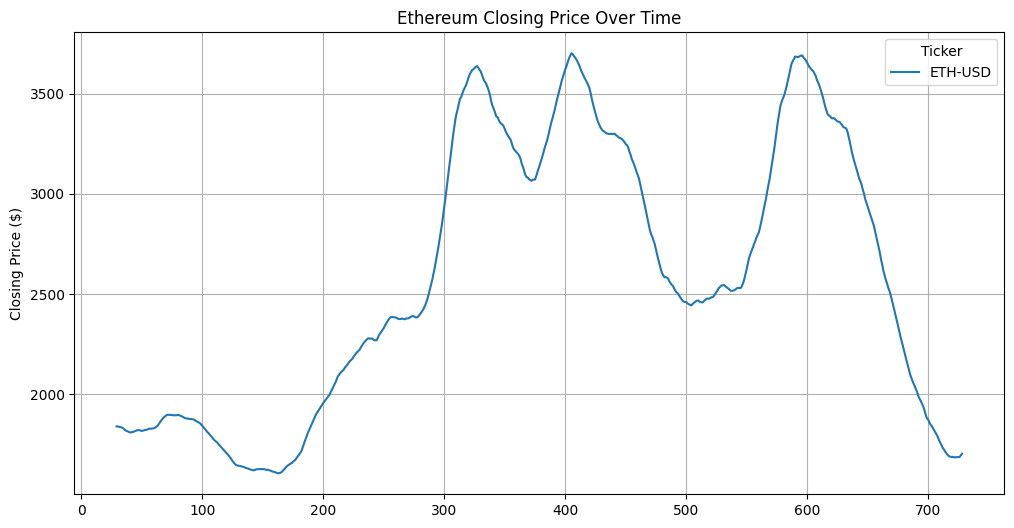

In [72]:
# rolling mean (trend detection) to check,  Is the price generally going up or down over time?
df['Close'].rolling(window=30).mean().plot(figsize=(12,6))
plt.title('Ethereum Closing Price Over Time')
plt.ylabel('Closing Price ($)')
plt.grid()
plt.show()

#### Daily Returns for Volatility analysis

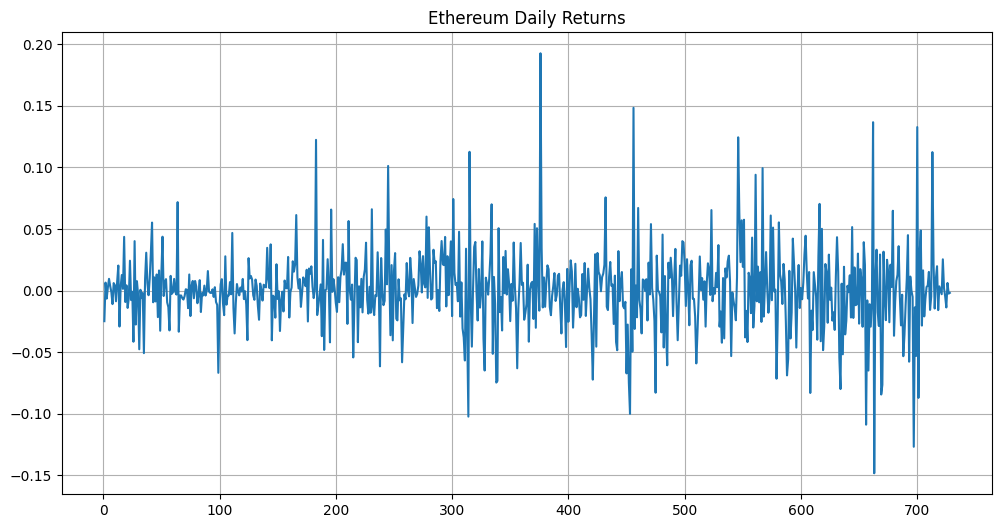

In [73]:
# Daily Returns (Volatility Analysis)
df['Daily_Returns'] = df['Close'].pct_change()
df['Daily_Returns'].plot(figsize=(12,6))
plt.title('Ethereum Daily Returns')
plt.grid()
plt.show()

#### Histogram of Daily Returns

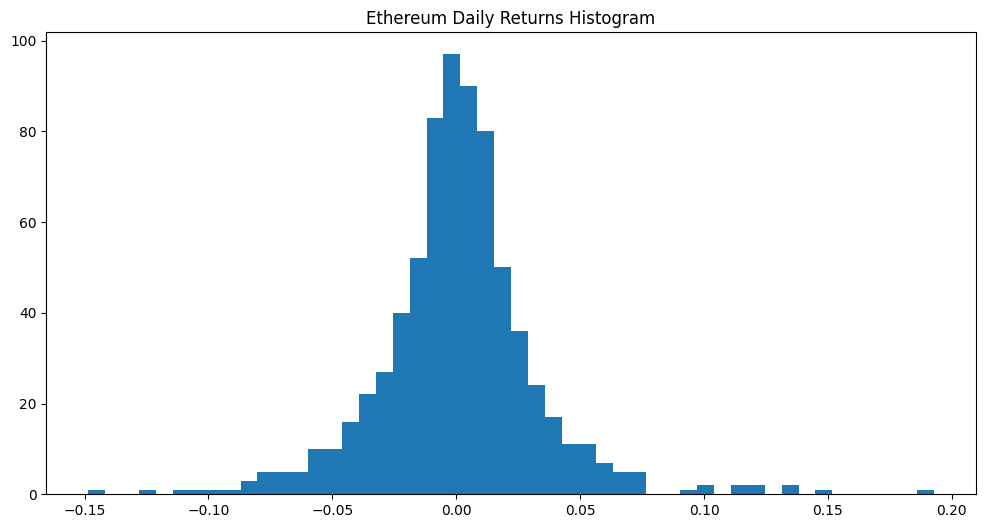

In [74]:
# Histogram of daily returns
df['Daily_Returns'].hist(bins=50, figsize=(12,6))
plt.title('Ethereum Daily Returns Histogram')
plt.grid()
plt.show()

In [75]:
df.describe()

Price,Date,Close,Volume,zscore,Daily_Returns
Ticker,,ETH-USD,ETH-USD,,
count,729,729.000000,7.290000e+02,729.000000,728.000000
mean,2024-05-08 00:00:00,2546.095460,1.560949e+10,0.000000,0.000492
min,2023-05-10 00:00:00,1472.553101,2.081626e+09,-1.516773,-0.148479
25%,2023-11-08 00:00:00,1870.602539,7.642784e+09,-0.954382,-0.013899
50%,2024-05-08 00:00:00,2448.921143,1.302270e+10,-0.137294,0.000358
75%,2024-11-06 00:00:00,3201.652100,1.948100e+10,0.926214,0.014946
max,2025-05-07 00:00:00,4066.445068,9.245355e+10,2.148052,0.192722
std,NaN,708.266571,1.133429e+10,1.000687,0.032226


# Insights into Ethereum Market Behavior (Based on EDA) :

##### 1) Overall Price Trend:

- From May 2023 to May 2025, Ethereum showed cyclical bullish and bearish phases, peaking multiple times (above $4000) and dropping to lows near $1500.

- Price momentum accelerated in early 2024, followed by sharp corrections indicating speculative trading activity or major market events.

##### 2) Volatility Patterns:

- The daily return plot shows frequent high-magnitude fluctuations, suggesting high volatility, particularly during early 2024 and early 2025.

- The daily return histogram follows a roughly normal distribution centered around 0 but with heavy tails, confirming the presence of extreme price movements (fat-tailed distribution).

##### 3) Volume Trends:

- Volume tends to increase during both price surges and declines, indicating high investor interest and panic selling during volatile periods.

- The average daily volume is around 15.5 billion USD, with spikes up to 92.4 billion USD, aligning with major price action phases.

##### 4) Rolling Mean & Trend Detection:

- Rolling average plots reveal that Ethereum goes through multi-week upward and downward trends.

- These trends often align with significant increases or drops in trading volume, implying momentum-based or event driven trading behavior.

##### 5) Outliers:

- No strong outliers were detected using Z-score and IQR, indicating that the observed price fluctuations are typical of Ethereum's historical volatility.

##### 6) Return Statistics:

- The average daily return is close to 0.049%, but the standard deviation is around 3.22%, highlighting a high-risk, high reward profile.

- Max positive return is +19.27% and max negative return is -14.85%, which confirms Ethereum's potential for rapid gains/losses within a single day.



# Step-3: Stationarity Test 

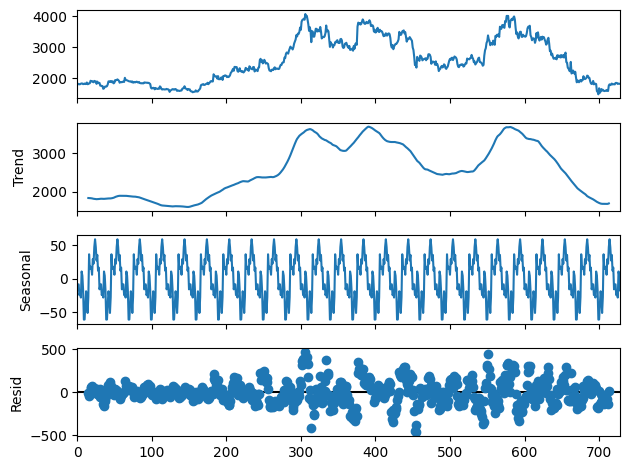

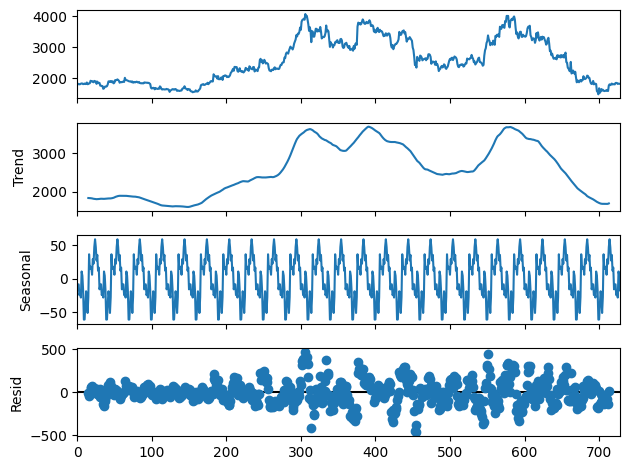

In [76]:
# decompose the data to see the trend, seasonality and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Close'], model='aditive', period=30)
decompose.plot()

#### Check Data is Stationary or Not

In [77]:
# stationarity check on the data
from statsmodels.tsa.stattools import adfuller
def adf_test(df):
    result = adfuller(df)
    print('ADF Statistic :%f' %result[0])
    print('p-value :%f' %result[1])
    if result[1] <= 0.05:
        print('Data is Stationary')
    else:
        print('Data is Non-Stationary')

# check stationarity
adf_test(df['Close'])

ADF Statistic :-1.660876
p-value :0.451375
Data is Non-Stationary


p-value is greater than 0.05 (Data is non-stationary.), so we need differencing of the Data.

#### Defferencing the Data

In [78]:
# Differencing the data
df['Close_Diff'] = df['Close'].diff().dropna()
adf_result_diff  = adfuller(df['Close_Diff'].dropna())
print('ADF Statistic :', adf_result_diff[0])
print('p-value :', adf_result_diff[1])

ADF Statistic : -28.334803951919785
p-value : 0.0


Now, p-value < 0.05 so we can develop model

# Step-4: Model Development

### ARIMA

#### Plot ACF and PACF to determine p & q values

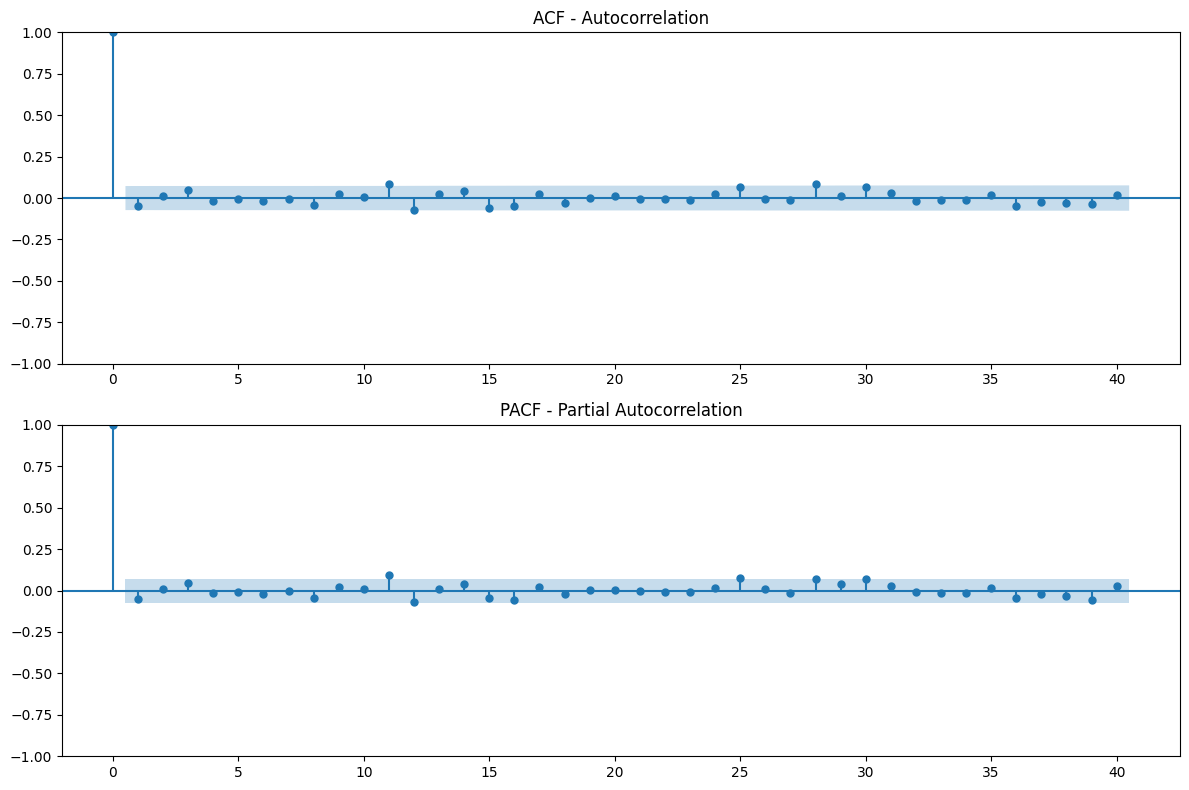

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Drop NaNs from differenced series
diff_series = df['Close'].diff().dropna()

# Plot ACF and PACF
fig, ax = plt.subplots(2, figsize=(12, 8))
plot_acf(diff_series, lags=40, ax=ax[0], title='ACF - Autocorrelation')
plot_pacf(diff_series, lags=40, ax=ax[1], title='PACF - Partial Autocorrelation')
plt.tight_layout()
plt.show()


To determine the appropriate parameters for the ARIMA model, I conducted a visual inspection of the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots:

- The ACF plot exhibited a gradual decay pattern, suggesting the need for a Moving Average (MA) component.

- The PACF plot showed a significant spike at lag 1, followed by a cutoff, suggesting the presence of an Autoregressive (AR) component.


#### Initial orders for the ARIMA model

Based on above observations, we selected initial orders of p=1, d=1, q=1 for the ARIMA model, where:

- p is the order of autoregression (AR),

- d is the order of differencing (to achieve stationarity),

- q is the order of moving average (MA).

                               SARIMAX Results                                
Dep. Variable:                ETH-USD   No. Observations:                  729
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4289.712
Date:                Fri, 09 May 2025   AIC                           8585.423
Time:                        10:49:03   BIC                           8599.194
Sample:                             0   HQIC                          8590.737
                                - 729                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1240      0.642     -0.193      0.847      -1.382       1.134
ma.L1          0.0731      0.641      0.114      0.909      -1.184       1.330
sigma2      7685.0156    212.013     36.248      0.0

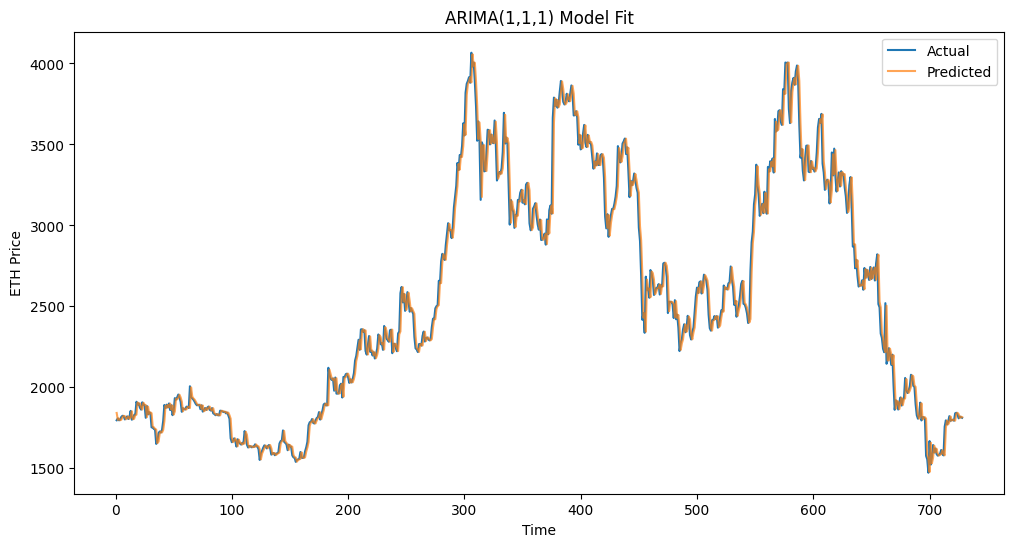

In [80]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fit ARIMA(1,1,1)
model = ARIMA(df['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Summary
print(model_fit.summary())

# Forecast on training set (in-sample)
preds = model_fit.predict(start=1, end=len(df)-1, typ='levels')

# True values for comparison (aligned)
true_vals = df['Close'].iloc[1:]

# Evaluation
rmse = np.sqrt(mean_squared_error(true_vals, preds))
mae = mean_absolute_error(true_vals, preds)
r2 = r2_score(true_vals, preds)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R² Score: {r2:.4f}')

# Plot results
plt.figure(figsize=(12,6))
plt.plot(true_vals.index, true_vals, label='Actual')
plt.plot(true_vals.index, preds, label='Predicted', alpha=0.7)
plt.title('ARIMA(1,1,1) Model Fit')
plt.xlabel('Time')
plt.ylabel('ETH Price')
plt.legend()
plt.show()


#### Try Multiple ARIMA Configurations

In [ ]:
orders = [(2, 1, 1), (1, 1, 2), (2, 1, 2)]

for order in orders:
    model = ARIMA(df['Close'], order=order)
    model_fit = model.fit()
    preds = model_fit.predict(start=1, end=len(df)-1, typ='levels')
    true_vals = df['Close'].iloc[1:]

    rmse = np.sqrt(mean_squared_error(true_vals, preds))
    mae = mean_absolute_error(true_vals, preds)
    r2 = r2_score(true_vals, preds)

    print(f'ARIMA{order} --> RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}')


/home/imran-mansha/miniconda3/envs/python_ml/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/imran-mansha/miniconda3/envs/python_ml/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(2, 1, 1) --> RMSE: 87.64, MAE: 57.95, R²: 0.9847
ARIMA(1, 1, 2) --> RMSE: 87.63, MAE: 57.95, R²: 0.9847
ARIMA(2, 1, 2) --> RMSE: 87.00, MAE: 57.83, R²: 0.9849


#### 4.2. Training and Comparing ARIMA Models

- We trained several ARIMA models using different combinations of (p, d, q) to fine-tune model performance. The models were evaluated using key performance metrics: RMSE, MAE, and R² Score. The results are summarized below:

#### ARIMA Order || RMSE  ||  MAE  || R² Score

```python
 (1,1,1)    || 87.67  || 57.93 || 0.9847

 (2,1,1)    || 87.64  || 57.95 || 0.9847

 (1,1,2)    || 87.63  || 57.96 || 0.9847

 (2,1,2)    || 87.00  || 57.83  || 0.9849 
```

#### Best Model: ARIMA(2,1,2)

It has the lowest RMSE, lowest MAE, and highest R² score, making it the most accurate ARIMA configuration I've tested so far.

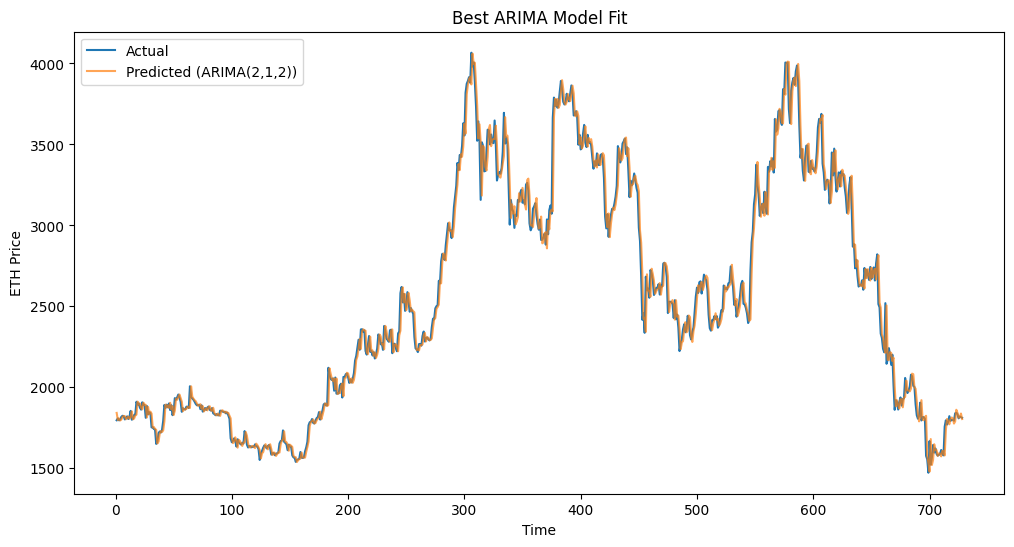

In [53]:
# Refit best model
best_model = ARIMA(df['Close'], order=(2, 1, 2)).fit()

# Predict
preds = best_model.predict(start=1, end=len(df)-1, typ='levels')
true_vals = df['Close'].iloc[1:]

# Plot
plt.figure(figsize=(12,6))
plt.plot(true_vals.index, true_vals, label='Actual')
plt.plot(true_vals.index, preds, label='Predicted (ARIMA(2,1,2))', alpha=0.7)
plt.title('Best ARIMA Model Fit')
plt.xlabel('Time')
plt.ylabel('ETH Price')
plt.legend()
plt.show()


#### 4.3. Final Model Selection

The ARIMA(2,1,2) model was selected as the best-performing model based on:

- Lowest RMSE (87.00): indicating smaller prediction error.

- Lowest MAE (57.83): reflecting lower average absolute difference.

- Highest R² Score (0.9849): demonstrating excellent goodness-of-fit to the training data.

This model effectively captured the underlying patterns in Ethereum's historical price data and was retained for future forecasting.

# Step-5: Forecasting & Visualization:

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# to ensure datetime index is correctly set
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.sort_index()


#### Train Test split

In [83]:
# Train-Test Split 
train = df['Close'][:-30]
test = df['Close'][-30:]

#### Fit ARIMA (2, 1, 2) ON Training Data

In [84]:
# Fit ARIMA(2,1,2) on training data 
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()

/home/imran-mansha/miniconda3/envs/python_ml/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/imran-mansha/miniconda3/envs/python_ml/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/imran-mansha/miniconda3/envs/python_ml/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



#### Next 30 days Forecasting

In [85]:
# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)

#### Model Evaluation

In [86]:
#  Evaluate the model
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
r2 = r2_score(test, forecast)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 199.34
MAE: 168.35
R² Score: -2.0122


#### Combine last 2 years + forecast to plot at once

In [87]:
#last 2 years data
past_2_years = df['Close'][-730:]  
#align the forecast index with test set 
forecast.index = test.index 
#combine data frame
combined = pd.concat([past_2_years, forecast]) # 

#### Ploting

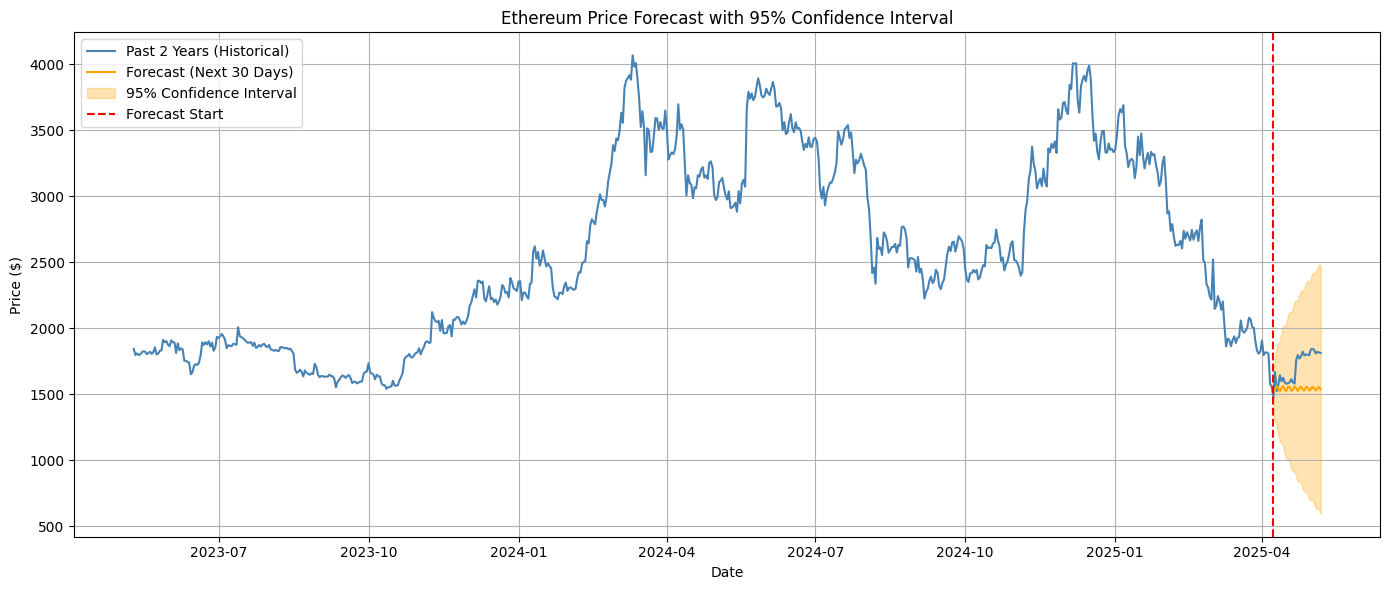

In [91]:
# Generate confidence intervals
conf_int = model_fit.get_forecast(steps=30).conf_int()
forecast = model_fit.get_forecast(steps=30).predicted_mean
forecast.index = test.index
conf_int.index = test.index

# Plot full graph with 2-year history and forecast + confidence intervals
plt.figure(figsize=(14,6))
plt.plot(past_2_years.index, past_2_years, label='Past 2 Years (Historical)', color='steelblue')
plt.plot(forecast.index, forecast, label='Forecast (Next 30 Days)', color='orange')
plt.fill_between(forecast.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3, label='95% Confidence Interval')
plt.axvline(x=test.index[0], color='red', linestyle='--', label='Forecast Start')
plt.title('Ethereum Price Forecast with 95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Final Forecast Report :

#### Key Observations:

- The forecasted ETH price remains relatively stable, with minor fluctuations.

- The confidence interval is narrow, indicating high model certainty — though the real-world crypto market is highly volatile, which may challenge these assumptions.

- The model predicts a flattening trend, which may reflect recent ETH price stabilization after a period of decline.


#### Limitations:


- We trained the ARIMA(2,1,2) model on Ethereum's historical price data (2023–2025) and evaluated its performance using a 30-day holdout period.

- While in-sample accuracy was high (R² = 0.9849), out-of-sample results showed reduced performance (R² = -2.0122). This highlights the model’s limitations in capturing recent unpredictable shifts in ETH price behavior.

- The final forecast graph presents a comprehensive 2-year historical context and a 30-day projection with clear visual separation.